# Data Science



**Content:**
1. [120 Years of Olympic History Dataset](#1)
2. [Cleaning the Data](#2)
3. [Univariate Data Analysis](#3)
4. [Bivariate Data Analysis](#4)
5. [Multivariate Data Analysis](#5)
6. [Data Analysis in Time Series](#6)

<a id='1'></a>
## 120 Years of Olympic History Dataset

* Names and descriptions of the columns in the dataset
    1. ID - Unique number for each athlete
    2. Name - Athlete's name
    3. Gender - M(Male) - F(Female)
    4. Age 
    5. Height - Centimeter
    6. Weight - Kilogram
    7. Team - Team name
    8. NOC - National Olympic Committee 3-letter code
    9. Games - Year and season
    10. Year 
    11. Season - Summer or Winter
    12. City - Organized City
    13. Sport 
    14. Event 
    15. Medal

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Turn off warnings in python
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import data
data = pd.read_csv("dataset_20220203_olympics.csv")
data.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Information About Data
 *  In this section, let's answer the basic questions necessary to get to know the data, such as how many examples are in each column in the data, what are the data types of these data, and what is the distribution of data types in the whole data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


<a id='2'></a>
## Cleaning the Data

* Removing and Editing Useless Data
* Lost Data Issue

In [ ]:
# Removing and Editing Useless Data
# The id column will be omitted as it does not provide any information about the data.
# Since the games column is a combination of the year and season columns, it is considered useless data and can be removed.


# Output id and games with drop method.
data = data.drop(["ID", "Games"], axis = 1) # axis = 1 means subtracting columns
data.head()

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Lost Data Issue
* The concept of missing data means the absence of a value in any column of the sample in the data.
* For example, in the data below, NaN (Not a Number) is written in the height and weight columns of the example in the second index. This NaN text means that the height and weight data of the sample are missing or missing.

In [ ]:
data.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


* To combat lost data,
    1. Samples of missing data can be extracted from the data.
    1. Missing data can be filled according to the mean or median values ​​of the original data, without disturbing the distribution of the original data.
* While working on this data,
    1. We will fill in the missing data in the height and weight column according to the activity average.
    1. We will fill in the missing data in the age column according to the average age of the data set.
    1. We will remove the athletes who did not receive medals from the data set.

In [ ]:
# Filling Lost Data in Height and Weight Column
## Fill in the missing data in the height and weight column according to the activity average

#1. Fill in the missing data in the height and weight column based on the activity average.
unique_event = pd.unique(data.Event)
print("Unique event count: {}".format(len(unique_event)))
unique_event[:10]

Unique event count: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [ ]:
# loop each event iteratively
# find the average height and weight for the event
# equate the average height and weight values ​​to the values ​​lost in height and weight for the activity

data_temporary = data.copy() # set data_temp variable to avoid losing real data
height_weight_list = ["Height", "Weight"]

for u in unique_event: # navigate through the event list

    # create event filter
    event_filter = data_temporary.Event == u
    # filter data by event
    data_filtered = data_temporary[event_filter]

    # find event specific average for height and weight
    for s in height_weight_list:
      average = np.round(np.mean(data_filtered[s]),2)

      if ~np.isnan(average): # if event specific average
        data_filtered[s] = data_filtered[s].fillna(average)

      else: # find average for all data if there is no average for event specific
        total_data_average = np.round(np.mean(data[s]),2)
        data_filtered[s] = data_filtered[s].fillna(total_data_average)
        # sync data with missing values ​​filled in activity specific to data temporary
        data_temporary[event_filter] = data_filtered


data = data_temporary.copy()
data.info()  # look for the number of missing values ​​in the height and weight columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Gender  271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  215572 non-null  float64
 4   Weight  212901 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


### Filling in Age Column Missing Data
* Fill in the missing data in the age column according to the average age of the data set.

In [ ]:
# find instances where the age variable is not defined,
# get the inverse with the tilda sign
# create filter to find instances with age variable defined

average_age = np.round(np.mean(data.Age),2)
print("The average age: {}".format(average_age))
data["Age"] = data["Age"].fillna(average_age)
data.info()

The average age: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Gender  271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  215572 non-null  float64
 4   Weight  212901 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


### Removing Non Medal Athletes from the Dataset
* The athletes who do not receive medals are removed from the data set.

In [ ]:
# Medal variable not defined for a total of 231333 samples

medal_variable = data["Medal"]
pd.isnull(medal_variable).sum()

231333

In [ ]:
# find instances with no medal variable defined, (NaN)
# get the inverse with the tilda sign
# create filter to find instances with medal variable defined

medal_variant_filter = ~pd.isnull(medal_variable)

In [ ]:
data = data[medal_variant_filter]
data.head(5)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Gender  271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  215572 non-null  float64
 4   Weight  212901 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
# Save data
data.to_csv("olympics_cleared.csv", index=False)


<a id='3'></a>
## Univariate Data Analysis
* Numeric Variables
* Categorical Variables

### Numeric Variables
* There are 4 numerical variables in the data. These:
     1. age
     2. height
     3. weight
     4. year
* Use data tightness and basic statistical knowledge to examine and interpret numerical variables
* Examine the data frequency information with the histogram graph.
* Interpret the basic statistical information with the box graph.

In [ ]:
# first write our method to get the histogram graph.
def plotHistogram(variable):

  plt.figure()
  plt.hist(data[variable], bins = 85, color = "blue")
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title("Data Frequency - {}" .format(variable))
  plt.show()

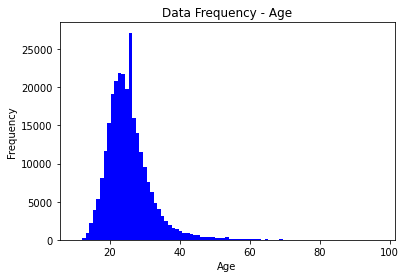

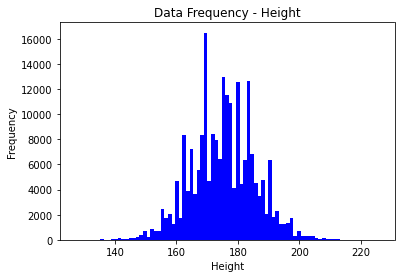

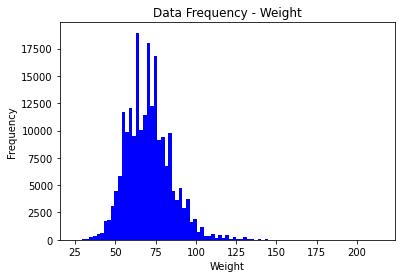

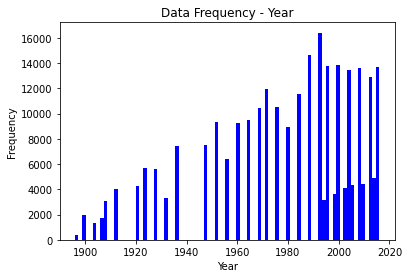

In [ ]:
# Plot histograms for numeric variables.
numeric_variables = ["Age", "Height", "Weight", "Year"]
for i in numeric_variables:
  plotHistogram(i)

In [ ]:
# analyze the numerical values ​​in the data from a statistical point of view.
data.describe()

,Age,Height,Weight,Year
count,271116.000000,215572.000000,212901.000000,271116.000000
mean,25.557007,175.315836,70.702341,1978.378480
std,6.280857,10.414378,14.190125,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,22.000000,168.000000,61.000000,1960.000000
50%,25.000000,175.000000,70.000000,1988.000000
75%,28.000000,182.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


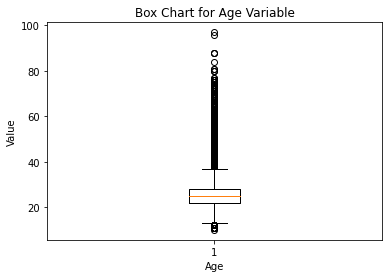

In [ ]:
# apply filter for age variable then draw boxplot
plt.boxplot(data.Age)
plt.title("Box Chart for Age Variable")
plt.xlabel("Age")
plt.ylabel("Value")
plt.show()

### Categorical Variables
  1. name
  2. gender
  3. team
  4. noc
  5. season
  6. city
  7. sports
  8. event
  9. medal

* Use bar charts to examine and interpret categorical variables.

In [ ]:
# first write our method to get the bar graph.
def plotBar(variable, v = 5): # v = top 10 unique values
    data_ = data[variable]
    data_counting = data_.value_counts()
    data_counting = data_counting[:v]
    plt.figure()
    plt.bar(data_counting.index, data_counting, color = "blue")
    plt.xticks(data_counting.index, data_counting.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}".format(variable))
    plt.show()
    print("{}: \n {}".format(variable, data_counting))

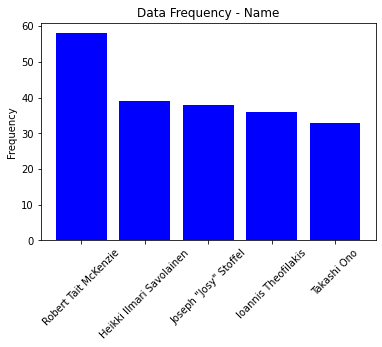

Name: 
 Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Name: Name, dtype: int64


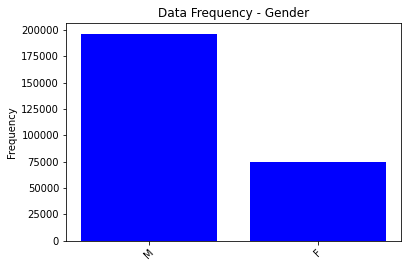

Gender: 
 M    196594
F     74522
Name: Gender, dtype: int64


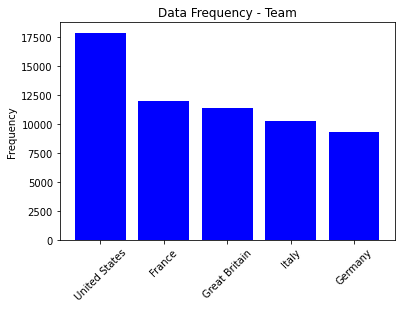

Team: 
 United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: Team, dtype: int64


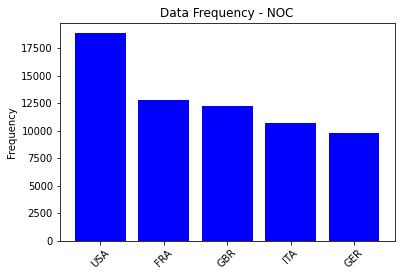

NOC: 
 USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: NOC, dtype: int64


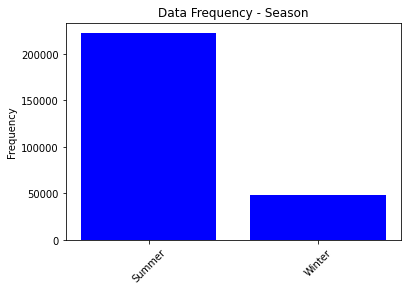

Season: 
 Summer    222552
Winter     48564
Name: Season, dtype: int64


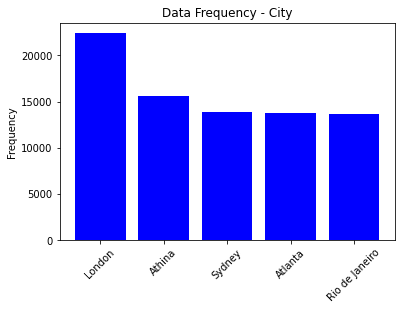

City: 
 London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: City, dtype: int64


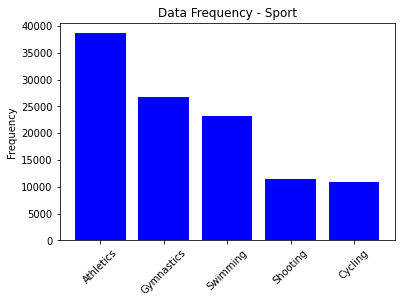

Sport: 
 Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64


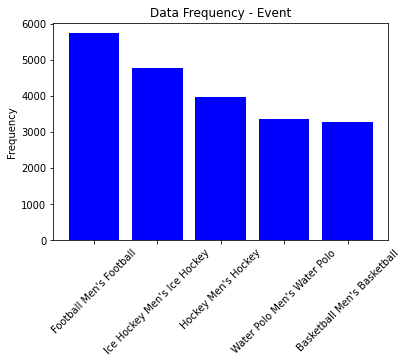

Event: 
 Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: Event, dtype: int64


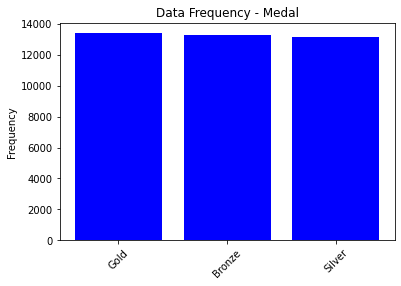

Medal: 
 Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [ ]:
# plot histograms for numeric variables
categorical_variable = ["Name","Gender", "Team", "NOC", "Season", "City", "Sport", "Event", "Medal"]

for i in categorical_variable:
    plotBar(i)

<a id='4'></a>
## Bivariate Data Analysis

### Height and Weight Comparison by Gender

In [ ]:
male = data[data.Gender == "M"]
male.head(2)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [ ]:
female = data[data.Gender == "F"]
female.head(2)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


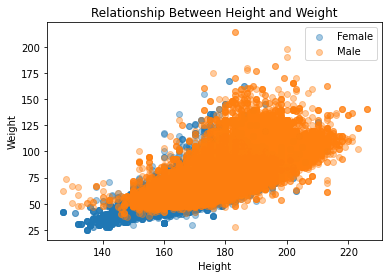

In [ ]:
# look at the height relationship between men and women
plt.figure()
plt.scatter(female.Height, female.Weight,  alpha = 0.4, label = "Female")
plt.scatter(male.Height, male.Weight,  alpha = 0.4, label = "Male")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Relationship Between Height and Weight")
plt.legend()
plt.show()

* We understand that there is a positive relationship between height and weight.

### Relationship Analysis Between Numeric Columns

In [ ]:
# relationship analysis between numerical data
data.loc[:,["Age", "Height", "Weight"]].corr() # correlation table

,Age,Height,Weight
Age,1.000000,0.127189,0.198594
Height,0.127189,1.000000,0.795259
Weight,0.198594,0.795259,1.000000


* We can see the positive relationship between height and weight, which we saw in the previous chart, in the correlation table.

### Relationship Between Medal and Age

In [ ]:
# Divide into 3 different groups: gold, silver and bronze.
data_temporary = data.copy()
data_temporary = pd.get_dummies(data_temporary, columns=['Medal'])
data_temporary.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0,0,0


In [ ]:
data_temporary.loc[:,["Age", "Medal_Bronze", "Medal_Gold", "Medal_Silver"]].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,0.011398,0.012338,0.015432
Medal_Bronze,0.011398,1.000000,-0.051724,-0.051201
Medal_Gold,0.012338,-0.051724,1.000000,-0.051356
Medal_Silver,0.015432,-0.051201,-0.051356,1.000000


### Number of Gold, Silver and Bronze Medals Won by Teams

In [ ]:
data_temporary[["Team","Medal_Gold", "Medal_Silver", "Medal_Bronze"]].groupby(["Team"], as_index = False).sum().sort_values(by="Medal_Gold",ascending = False)[:10]

,Team,Medal_Gold,Medal_Silver,Medal_Bronze
1095,United States,2474.0,1512.0,1233.0
976,Soviet Union,1058.0,716.0,677.0
398,Germany,679.0,627.0,678.0
506,Italy,535.0,508.0,484.0
412,Great Britain,519.0,582.0,572.0
361,France,455.0,518.0,577.0
1010,Sweden,451.0,476.0,507.0
476,Hungary,432.0,330.0,365.0
173,Canada,422.0,413.0,408.0
301,East Germany,369.0,309.0,263.0


### Number of Gold, Silver and Bronze Medals Won by Gender

In [ ]:
data_temporary[["Gender","Medal_Gold", "Medal_Silver", "Medal_Bronze"]].groupby(["Gender"], as_index = False).sum().sort_values(by="Medal_Gold",ascending = False)[:10]

,Gender,Medal_Gold,Medal_Silver,Medal_Bronze
1,M,9625.0,9381.0,9524.0
0,F,3747.0,3735.0,3771.0


<a id='5'></a>
## Multivariate Data Analysis

* Pivot Table



In [ ]:
data_pivot = data.pivot_table(index="Medal", columns = "Gender",
                 values=["Height","Weight","Age"], 
                aggfunc={"Height":np.mean,"Weight":np.mean,"Age":[min, max, np.std]})
data_pivot.head()

Age                                            Height              \
         max         min             std                  mean               
Gender     F     M     F     M         F         M           F           M   
Medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329229  5.870340  170.236064  180.602321   
Gold    63.0  64.0  13.0  13.0  5.219615  5.987807  170.700966  181.038542   
Silver  55.0  73.0  11.0  13.0  5.253111  6.098221  170.503551  180.658246   

           Weight             
             mean             
Gender          F          M  
Medal                         
Bronze  63.058068  78.414795  
Gold    63.503270  78.916353  
Silver  63.195713  78.557967

* In this table, we can see the maximum, minimum and standard deviation of the average age parameter of the height and weight parameters for different medals and genders.

<a id='6'></a>
## Data Analysis in Time Series
* Average Age, Height and Weight Change by Years
* Number of Medals by Years

In [ ]:
data_time = data.copy()
data_time.head(2)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze


In [ ]:
# find the unique years when the olympics took place.
unique_years = data_time.Year.unique()
unique_years

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [ ]:
# sort the years from smallest to largest.
yeer_array = np.sort(data_time.Year.unique())
yeer_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

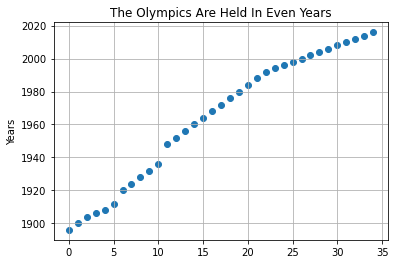

In [ ]:
plt.figure()
plt.scatter(range(len(yeer_array)),yeer_array)
plt.grid(True)
plt.ylabel("Years")
plt.title("The Olympics Are Held In Even Years")
plt.show()

In [ ]:
# converting the years in the data to datetime data type
date_time_object = pd.to_datetime(data_time['Year'], format = '%Y')
print(type(date_time_object))
date_time_object.head(4)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
40   2014-01-01
Name: Year, dtype: datetime64[ns]

In [ ]:
# open a new column for the data as datetime and add the datatime data type we obtained in the previous row.
data_time["Date_Time"] = date_time_object
data_time.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Date_Time
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [ ]:
# Make the datetime data type in the date_time column the index of the actual data.
# There are special structures in the pandas library for working with datasets whose index is datetime data type.
# Therefore, our aim is to make the index a datetime data type.
data_time = data_time.set_index("Date_Time")
data_time.drop(["Year"], axis = 1, inplace = True)
data_time.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal
Date_Time,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


### Average Age, Height and Weight Change by Years

In [ ]:
periodic_data = data_time.resample("2A").mean() # Average values ​​over 2-year periods
periodic_data.head()

,Age,Height,Weight
Date_Time,,,
1896-12-31,23.905734,175.297647,71.496078
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,175.341387,70.982119
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,175.250529,71.509091


In [ ]:
# extract lost data
periodic_data.dropna(axis=0, inplace = True)
periodic_data.head()

,Age,Height,Weight
Date_Time,,,
1896-12-31,23.905734,175.297647,71.496078
1900-12-31,27.786689,175.341387,70.982119
1904-12-31,26.363868,175.250529,71.509091
1906-12-31,26.479389,175.739488,73.244041
1908-12-31,27.566739,175.333932,73.631429


<Figure size 432x288 with 0 Axes>

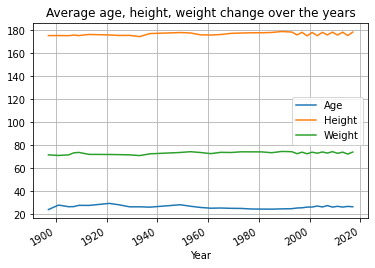

In [ ]:
plt.figure()
periodic_data.plot()
plt.title("Average age, height, weight change over the years")
plt.xlabel("Year")
plt.grid(True)
plt.show()

### Number of Medals by Years

In [ ]:
data_time = pd.get_dummies(data_time,  columns=['Medal'])
data_time.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
Date_Time,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [ ]:
periodic_data = data_time.resample("2A").sum() # Average values ​​over 2-year periods
periodic_data.head()
# extract lost data
periodic_data = periodic_data[~(periodic_data == 0).any(axis=1)]
periodic_data.tail()

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_Time,,,,,,
2008-12-31,53344.0,364316.0,151338.0,710.0,671.0,667.0
2010-12-31,13896.0,91395.0,37512.0,171.0,174.0,175.0
2012-12-31,50595.0,345550.0,141449.5,679.0,632.0,630.0
2014-12-31,15907.0,104686.0,41159.0,198.0,202.0,197.0
2016-12-31,53256.0,360309.0,149033.0,703.0,665.0,655.0


### Medals by Years and Seasons

In [ ]:
# divide the data into 2 as summer and winter
summer = data_time[data_time.Season == "Summer"]
winter = data_time[data_time.Season == "Winter"]
summer.head(3)

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
Date_Time,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [ ]:
# for summer
periodic_data_summer = summer.resample("A").sum() 

# extract lost data
periodic_data_summer = periodic_data_summer[~(periodic_data_summer == 0).any(axis=1)]
periodic_data_summer.head()

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_Time,,,,,,
1896-12-31,3418.52,8940.18,3646.3,38.0,62.0,43.0
1900-12-31,16783.16,54355.83,21436.6,175.0,201.0,228.0
1904-12-31,12812.84,33122.35,13372.2,150.0,173.0,163.0
1906-12-31,12127.56,37783.99,14136.1,145.0,157.0,156.0
1908-12-31,22907.96,56632.86,28348.1,256.0,294.0,281.0


In [ ]:
# for winter
periodic_data_wniter = summer.resample("A").sum() 

# extract lost data
periodic_data_wniter = periodic_data_wniter[~(periodic_data_wniter == 0).any(axis=1)]
periodic_data_wniter.head()

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_Time,,,,,,
1896-12-31,3418.52,8940.18,3646.3,38.0,62.0,43.0
1900-12-31,16783.16,54355.83,21436.6,175.0,201.0,228.0
1904-12-31,12812.84,33122.35,13372.2,150.0,173.0,163.0
1906-12-31,12127.56,37783.99,14136.1,145.0,157.0,156.0
1908-12-31,22907.96,56632.86,28348.1,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

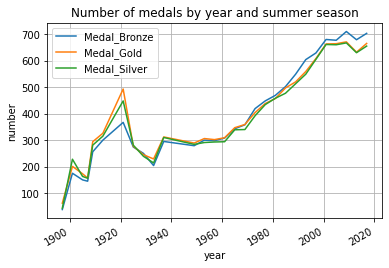

<Figure size 432x288 with 0 Axes>

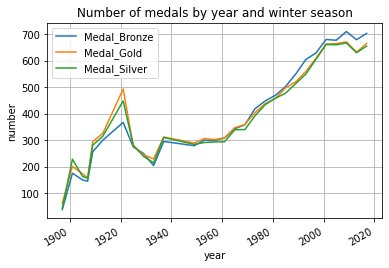

In [ ]:
plt.figure()
periodic_data_summer.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("Number of medals by year and summer season")
plt.ylabel("number")
plt.xlabel("year")
plt.grid(True)
plt.show()


plt.figure()
periodic_data_wniter.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("Number of medals by year and winter season")
plt.ylabel("number")
plt.xlabel("year")
plt.grid(True)
plt.show()
